# 核主成分分析(Kernel Principle Component Analysis, KPCA)

## 符号定义

|符号|含义|
|:--:|:--:|
|$\pmb{x}$|样本点|
|$X$|样本点构成的矩阵|
|$\pmb{y}$|降维后样本点|
|$Y$|降维后样本点构成的矩阵|
|$k$|降维前样本点维度|
|$d$|升维后样本点维度|
|$m$|降维后样本点维度|
|$N$|样本总数|
|$\phi$|映射函数|
|$\overset{\thicksim}\phi$|中心化后的映射函数|
|$Cov()$|协方差矩阵|
|$\pmb{p}$|特征向量|
|$\pmb{\lambda}$|特征向量|

## 概念

KPCA在PCA的基础上通过引入核函数实现非线性降维。

传统的PCA仅能实现线性降维，对于本身线性不可分的数据，通过PCA降维后往往得不到有价值的结果。另一方面，对于线性不可分的数据，映射到更高维度后很可能就是线性可分的，然后进行PCA降维很可能得到有价值的结果。

因此对于一个线性不可分的数据集，通过映射到高维从而实现线性可分是可能的。显然，这里涉及到一个非常关键的问题，那就是**确定映射函数**。显然，不同的映射方法适用于不同的数据集，同时，同一个特定的映射方法不可能适用于所有的数据集。这一问题为寻找通用的映射方法带来了困难。因此若能不显式的定义映射函数，并且依然能够实现后续的降维是再好不过了。KPCA正是这样一种依靠核函数和核技巧，在不显式定义映射函数的基础上实现非线性降维的算法。

## 推导

* **低维空间的数据映射到高维空间**

对于特定的样本点$\pmb{x} \in \mathcal{R}^k$，假设存在映射函数$\phi$，使得$\phi(\pmb{x}) \in \mathcal{R}^d$。即

$$
\begin{equation}
    \phi(\pmb{x}) : \mathcal{R}^k \rightarrow \mathcal{R}^d, \ d \gg k
\end{equation}
$$

若将所有样本点均映射到高维空间则可以得到对应的映射后样本点构成的矩阵$\phi(X) \in \mathcal{R}^{d\times N}$

$$
\begin{equation}
    \phi(X) = [\phi(\pmb{x_1}), \phi(\pmb{x_2}), \cdots, \phi(\pmb{x_N})]
\end{equation}
$$

* **高维空间的降维**

由PCA的推导可知，对于降维到$m$维的问题，在数据已经经过中心化的前提下，PCA实际上就是得到协方差矩阵前$m$个最大特征值对应的特征向量构成的子空间，因此有

$$
\begin{equation}
    \begin{split}
    Cov(\phi(X)) 
    &= \frac{1}{N}\phi(X)\phi(X)^T \\
    &= \frac{1}{N}\sum_{i=1}^N\phi(\pmb{x_i})\phi(\pmb{x_i})^T
    \end{split}
\end{equation}
$$

接下来就是上述协方差矩阵的特征值、特征向量求解问题。

$$
\begin{equation}
    \begin{split}
    Cov(\phi(X))\pmb{p} &= \lambda\pmb{p} \\
    \Rightarrow \frac{1}{N}\phi(X)\phi(X)^T\pmb{p} &= \lambda\pmb{p} \\
    \Rightarrow \phi(X)\phi(X)^T\pmb{p} &= N\lambda\pmb{p}
    \end{split}
\end{equation}
$$

考虑到实际应用中主要关心的是特征向量，为了简化起见，这里舍去$N$（令$\lambda=N\lambda$），得到下式
$$
\begin{equation}
    \begin{split}
    \phi(X)\phi(X)^T\pmb{p} &= \lambda\pmb{p} \\
    \Rightarrow \sum_{i=1}^N\phi(\pmb{x_i})\phi(\pmb{x_i})^T\pmb{p} &= \lambda\pmb{p}
    \end{split}
\end{equation}
$$

由于并没有显式的定义映射函数$\phi$，因此上式无法直接求解。上式中映射函数以$\phi(X)\phi(X)^T$的形式出现，因此可以尝试将$\phi(X)\phi(X)^T$看作整体，若能计算得到这个整体也能够解出相应的特征向量。

假设特征值$\lambda \neq 0$，有
$$
\begin{equation}
    \pmb{p} = \frac{1}{\lambda}\sum_{i=1}^N\phi(\pmb{x_i})\phi(\pmb{x_i})^T\pmb{p}
\end{equation}
$$

上式中$\phi(\pmb{x_i})^T\pmb{p}$为常数，因此特征向量$\pmb{p}$实际上可以视为$\phi(\pmb{x_i}), i=1, 2, \cdots, N$的线性组合，假设线性组合的权重为$\alpha_i, i=1, 2, \cdots, N$，则有

$$
\begin{equation}
    \pmb{p} = \sum_{i=1}^N\alpha_i\phi(\pmb{x_i}) = \phi(X)\pmb{\alpha}, \pmb{\alpha}= [\alpha_1, \alpha_2, \cdots, \alpha_N]^T
\end{equation}
$$

对于降维到$m$维的问题，实际上就是求解前m个最大特征值对应的特征向量，对于第$j$个特征向量，样本点$\pmb{x_i}$投影到该方向上的坐标为:

$$
\begin{equation}
    \begin{split}
    y_{ij} 
    &= \phi(\pmb{x_i})^T\pmb{p_j} \\
    &= \phi(\pmb{x_i})^T\phi(X)\pmb{\alpha_j}
    \end{split}
\end{equation}
$$

而所有样本点投影到该方向上的坐标为
$$
\begin{equation}
    \begin{split}
    \pmb{Y_j} 
    &= \phi(X)^T\pmb{p_j} \\
    &= \phi(X)^T\phi(X)\pmb{\alpha_j}
    \end{split}
\end{equation}
$$

显然若能求得$\phi(X)^T\phi(X)$和$\pmb{\alpha_j}$就能求得降维后的结果。

将式-7回代到式-5可以得到
$$
\begin{equation}
    \begin{split}
    \phi(X)\phi(X)^T\pmb{p} &= \lambda\pmb{p} \\ 
    \Rightarrow \phi(X)\phi(X)^T\phi(X)\pmb{\alpha} &= \lambda\phi(X)\pmb{\alpha} \\ 
    \Rightarrow \phi(X)^T\phi(X)\phi(X)^T\phi(X)\pmb{\alpha} &= \lambda\phi(X)^T\phi(X)\pmb{\alpha}
    \end{split}
\end{equation}
$$

令$K=\phi(X)^T\phi(X)$，有
$$
\begin{equation}
    K \cdot K\pmb{\alpha} = \lambda K\pmb{\alpha}
\end{equation}
$$
上式实际上就是求解矩阵$K$的特征值问题。值得注意的是矩阵$K$中每一项是两个向量的内积，即$K_{ij}=\phi(\pmb{x_i}^T)\phi(\pmb{x_j})$，这与核函数不谋而合，虽然无法在没有显式定义映射函数的情况下求得映射到高维后的向量，但是能够在低维找到一个函数，使得这个函数的解恰好就是映射到高维空间后两个向量的内积。

将矩阵$K$带入式-9，得到
$$
\begin{equation}
    \begin{split}
    \pmb{Y_j} 
    &= \phi(X)^T\phi(X)\pmb{\alpha_j} \\
    &= K\pmb{\alpha_j}
    \end{split}
\end{equation}
$$

上式揭示了矩阵K、矩阵K的特征向量$\alpha$以及降维后坐标之间的关系，显然，只要利用核函数得到矩阵K，就能够在不显示定义并计算映射函数$\phi(\pmb{x})$的情况下得到非线性升维并降维的结果。

上述结果并没有对主成分方向向量进行归一化，若想要得到归一化之后的结果，则想要进行如下处理。这里要注意是对主成分方向向量进行归一化，真实的投影方向是向量$\pmb{p}$，而不是向量$\pmb{\alpha}$，可以得到

$$
\begin{equation}
    \begin{split}
    \pmb{p}^T\pmb{p}
    &= 1 \\
    &= (\phi(X)\pmb{\alpha})^T\phi(X)\pmb{\alpha} \\
    &= \pmb{\alpha}^T\phi(X)^T\phi(X)\pmb{\alpha} \\
    &= \pmb{\alpha}^TK\pmb{\alpha} \\
    &= \lambda\pmb{\alpha}^T\pmb{\alpha}
    \end{split}
\end{equation}
$$

因此若要使得主成分方向向量归一化，应当在$\pmb{\alpha}$是单位向量的前提下，令$\pmb{\alpha} \leftarrow \frac{\pmb{\alpha}}{\sqrt\lambda}$

* **中心化**

上述推导是在$\phi(\pmb{x})$已经是中心化的前提下进行的（PCA的要求），但是显然，对于输入数据，不能保证经过非线性映射后是中心化的，因此需要对$\phi(\pmb{x})$进行专门的中心化。

$$
\begin{equation}
    \overset{\thicksim}\phi(\pmb{x}) = \phi(\pmb{x}) - \frac{1}{N}\sum_{i=1}^N\phi(\pmb{x_i})
\end{equation}
$$

若对每一个数据点均作中心化可以得到
$$
\begin{equation}
    \overset{\thicksim}\phi(X) = \phi(X) - \frac{1}{N}\phi(X)\pmb{1_{N\times N}}
\end{equation}
$$
其中，$\pmb{1_{N\times N}}$表示一个全为1的$N\times N$矩阵，由此可得中心化$\phi(X)$后的K矩阵

$$
\begin{equation}
    \begin{split}
    \overset{\thicksim}K 
    &= \overset{\thicksim}\phi(X)^T\overset{\thicksim}\phi(X) \\
    &= (\phi(X) - \frac{1}{N}\phi(X)\pmb{1_{N\times N}})^T(\phi(X) - \frac{1}{N}\phi(X)\pmb{1_{N\times N}}) \\
    &= \phi(X)^T\phi(X) - \frac{1}{N}\pmb{1_{N\times N}}\phi(X)^T\phi(X) - \frac{1}{N}\phi(X)^T\phi(X)\pmb{1_{N\times N}} + \frac{1}{N^2}\pmb{1_{N\times N}}\phi(X)^T\phi(X)\pmb{1_{N\times N}} \\
    &= K - \frac{1}{N}\pmb{1_{N\times N}}K - \frac{1}{N}K\pmb{1_{N\times N}} + \frac{1}{N^2}\pmb{1_{N\times N}}K\pmb{1_{N\times N}}
    \end{split}
\end{equation}
$$

上式即为中心化后的矩阵K

* **测试数据的处理**

测试数据同样需要进行中心化，不同于PCA中只要直接减去均值，KPCA中需要对$\phi(\pmb{x_{test}})$进行中心化，即

$$
\begin{equation}
    \overset{\thicksim}\phi(\pmb{x_{test}}) = \phi(\pmb{x_{test}}) - \frac{1}{N}\sum_{i=1}^N\phi(\pmb{x_i})
\end{equation}
$$

若对每一个测试数据点均作中心化可以得到
$$
\begin{equation}
    \overset{\thicksim}\phi(X_{test}) = \phi(X_{test}) - \frac{1}{N}\phi(X)\pmb{1_{N\times L}}
\end{equation}
$$

对数据进行降维，类似于式-9
$$
\begin{equation}
    \begin{split}
    \pmb{Y_{test j}} 
    &= \phi(X_{test})^T\pmb{p_j} \\
    &= \phi(X_{test})^T\phi(X)\pmb{\alpha_j} \\
    &= K_{test}\pmb{\alpha_j}
    \end{split}
\end{equation}
$$



同理可得

$$
\begin{equation}
    \begin{split}
    \overset{\thicksim}K_{test}
    &= \overset{\thicksim}\phi(X_{test})^T\overset{\thicksim}\phi(X) \\
    &= (\phi(X_{test}) - \frac{1}{N}\phi(X)\pmb{1_{N\times L}})^T(\phi(X) - \frac{1}{N}\phi(X)\pmb{1_{N\times N}}) \\
    &= \phi(X_{test})^T\phi(X) - \frac{1}{N}\pmb{1_{L\times N}}\phi(X)^T\phi(X) - \frac{1}{N}\phi(X_{test})^T\phi(X)\pmb{1_{N\times N}} + \frac{1}{N^2}\pmb{1_{L\times N}}\phi(X)^T\phi(X)\pmb{1_{N\times N}} \\
    &= K_{test} - \frac{1}{N}\pmb{1_{L\times N}}K - \frac{1}{N}K_{test}\pmb{1_{N\times N}} + \frac{1}{N^2}\pmb{1_{L\times N}}K\pmb{1_{N\times N}}
    \end{split}
\end{equation}
$$

## 算法流程

1. 定义原空间维度$k$，降维后维度$m$、数据集以及核函数
2. 由核函数计算矩阵$K$，其计算方式如下
$$
K_{ij}=\phi(\pmb{x_i}^T)\phi(\pmb{x_j}) = \mathcal{k}(\pmb{x_i}, \pmb{x_j})
$$
3. 由矩阵$K$计算中心化后的矩阵$\overset{\thicksim}K$，其计算方式如下
$$
    \overset{\thicksim}K = K - \frac{1}{N}\pmb{1_{N\times N}}K - \frac{1}{N}K\pmb{1_{N\times N}} + \frac{1}{N^2}\pmb{1_{N\times N}}K\pmb{1_{N\times N}}
$$
4. 对矩阵$\overset{\thicksim}K$进行谱分解得到前$m$个最大特征值$\lambda_1, \lambda_2, \cdots, \lambda_m$以及对应的特征向量$\pmb{\alpha_1}, \pmb{\alpha_2}, \cdots, \pmb{\alpha_m}$
5. 对特征向量进行归一化并使得主成分方向向量归一化
$$
    \pmb{\alpha} \leftarrow \frac{\pmb{\alpha}}{|\pmb{\alpha}|\sqrt\lambda}
$$
6. 计算降维后的坐标
$$
    \pmb{Y_j} = \overset{\thicksim}K\pmb{\alpha_{j}}, j=1, 2, \cdots, m
$$
7. 对于测试数据，则按照如下方式计算矩阵$\overset{\thicksim}K_{test}$
$$
    \begin{split}
    & K_{test} = \phi(X_{test})^T\phi(X) \\
    & K_{test\ ij} = \phi(\pmb{x_{test\ i}}^T)\phi(\pmb{x_j}) = \mathcal{k}(\pmb{x_{test\ i}}, \pmb{x_j}) \\
    & \overset{\thicksim}K_{test} = K_{test} - \frac{1}{N}\pmb{1_{L\times N}}K - \frac{1}{N}K_{test}\pmb{1_{N\times N}} + \frac{1}{N^2}\pmb{1_{L\times N}}K\pmb{1_{N\times N}}
    \end{split}
$$

## 参考资料

https://zhuanlan.zhihu.com/p/59775730

https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py

In [34]:
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.utils.extmath import svd_flip
import matplotlib.pyplot as plt

In [42]:
class MyKPCA(object):

    def __init__(self, n_components, kernel, gamma):
        
        self.n_components = n_components
        self.kernel = self.kernel_func(kernel)
        self.gamma = gamma

        self.mat_k = None
        self.mat_k_sim = None

        self._components = None
        self._lambdas = None

        self.train_data = None
    
    def fit_transform(self, input_data):
        self.fit(input_data)
        output_mat = self._components * self._lambdas
        return output_mat

    def fit(self, input_data):
        input_data = np.array(input_data)
        self.train_data = input_data.copy()
        samples_num, _ = input_data.shape
        self.mat_k = np.zeros((samples_num, samples_num))

        # compute matrix K
        self.mat_k = self._compute_mat_k(self.train_data)
        # compute matrix \overset{\thicksim}K
        self.mat_k_sim = self._compute_mat_k_sim(self.mat_k, self.mat_k)

        self._lambdas, self._components = self._topk_eigen(self.mat_k_sim, self.n_components)
        self._components, _ = svd_flip(self._components, np.zeros_like(self._components).T)
        for i in range(self.n_components):
            temp_component = self._components[:, i]
            temp_component = temp_component / (np.linalg.norm(temp_component) * np.sqrt(self._lambdas[i]))
            self._components[:, i] = temp_component.copy()

    def transform(self, input_data):

        mat_k_test = self._compute_mat_k(input_data)
        mat_k_test_sim = self._compute_mat_k_sim(self.mat_k, mat_k_test)

        output_mat = np.matmul(mat_k_test_sim, self._components)
        return output_mat
    
    def _compute_mat_k_sim(self, mat_k_train, mat_k_test):
        mat_k_sim = mat_k_test.copy()

        train_samples_num = mat_k_train.shape[0]
        ones_mat_like_test_data = np.ones_like(mat_k_test)
        ones_mat_list_train_data = np.ones_like(mat_k_train)

        mat_k_sim -= np.matmul(ones_mat_like_test_data, mat_k_train) / train_samples_num
        mat_k_sim -= np.matmul(mat_k_test, ones_mat_list_train_data) / train_samples_num
        mat_k_sim += ones_mat_like_test_data @ mat_k_train @ ones_mat_list_train_data / pow(train_samples_num, 2)
        
        return mat_k_sim

    def _compute_mat_k(self, input_data):
        input_data = np.array(input_data)
        samples_num = input_data.shape[0]

        k_mat = np.zeros((samples_num, self.train_data.shape[0]))

        for i in range(samples_num):
            for j in range(self.train_data.shape[0]):
                k_mat[i, j] = self.kernel(input_data[i, :], self.train_data[j, :])
        
        return k_mat

    def kernel_func(self, kernel_type):
        if kernel_type == "rbf":
            return self._rbf_kernel
        else:
            raise KeyError
    
    def _rbf_kernel(self, vec_1, vec_2):
        vec_1 = np.reshape(vec_1, (-1,))
        vec_2 = np.reshape(vec_2, (-1,))

        return np.exp(-self.gamma * np.power(np.linalg.norm(vec_1-vec_2), 2))
    
    def _topk_eigen(self, mat, k):
        e_vals, e_vecs = np.linalg.eigh(mat)
        sorted_ind = np.argsort(e_vals)

        topk_e_vals = e_vals[sorted_ind[:-1-k:-1]]
        topk_e_vecs = e_vecs[:, sorted_ind[:-1-k:-1]]
        return topk_e_vals, topk_e_vecs

In [14]:
# 数据数量
sample_num = 1000
# 方差
std_ = 0.1

x_list, y_list = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x_list, y_list, stratify=y_list, random_state=0)

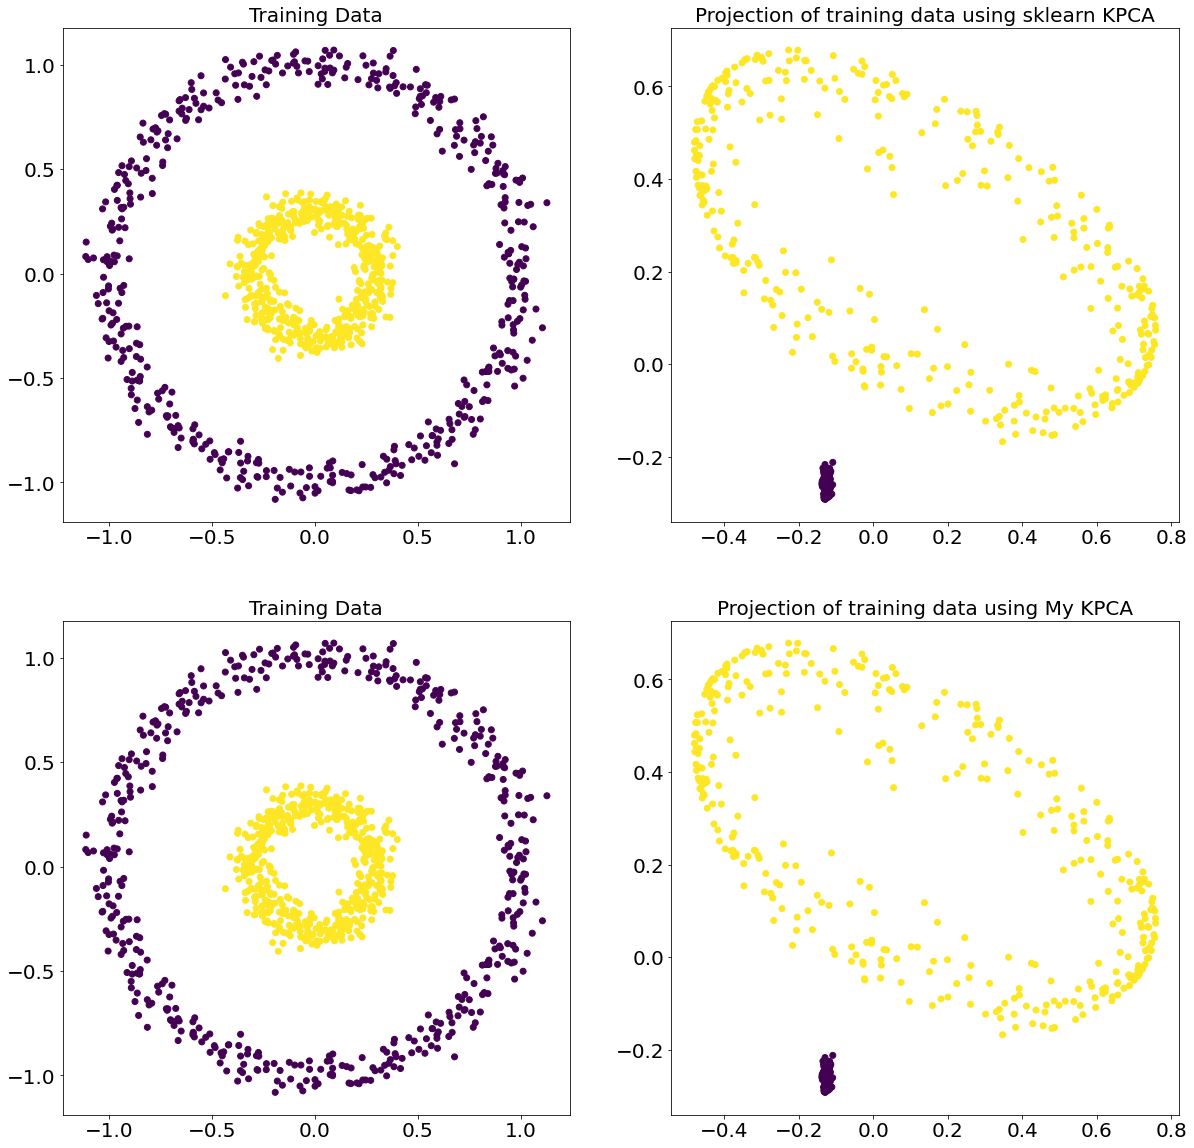

In [43]:
# --------------------------- sklearn kpca --------------------------- 
sklearn_kpca = KernelPCA(n_components=2, kernel="rbf", gamma=10)
sklearn_kpca_pred_x = sklearn_kpca.fit_transform(X_train)

# --------------------------- my kpca  --------------------------- 
my_kpca = MyKPCA(n_components=2, kernel="rbf", gamma=10)
my_kpca_pred_x = my_kpca.fit_transform(X_train)

# -------------------------------
# draw func
plt.figure(figsize=(20, 20))

plt.subplot(221)
plt.title("Training Data", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(x_list[:, 0], x_list[:, 1], c=y_list)
plt.subplot(222)
plt.title("Projection of training data using sklearn KPCA", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
binwidth = 0.03
plt.scatter(sklearn_kpca_pred_x[:, 0], sklearn_kpca_pred_x[:, 1], c=y_train)

plt.subplot(223)
plt.title("Training Data", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(x_list[:, 0], x_list[:, 1], c=y_list)
plt.subplot(224)
plt.title("Projection of training data using My KPCA", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
binwidth = 0.03
plt.scatter(my_kpca_pred_x[:, 0], my_kpca_pred_x[:, 1], c=y_train)

plt.show()